# Top 10 Rated AI Movies

In this notebook, we will list the Top 10 rated AI movies based on their rating. We will modify and use Bayesian average method for calculating the rating for each movie with tag "artificial intelligence" from average rating, number of user ratings and tag relevance score. Movies are rated and tagged by users of MovieLens website.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the Dataset

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

## Initial Exploration of the Dataset and Data Cleaning

Let us look at the files in this dataset using the UNIX commands ls and cat.

In [2]:
!ls ml-20m/

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


In [3]:
!cat ml-20m/README.txt

Summary

This dataset (ml-20m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on March 31, 2015, and updated on October 17, 2016 to update links.csv and add genome-* files.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in six files, `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.


Usage License

Neither the Universi

In [4]:
!cat ./ml-20m/movies.csv | wc -l
!cat ./ml-20m/tags.csv | wc -l
!cat ./ml-20m/ratings.csv | wc -l
!cat ./ml-20m/genome-scores.csv | wc -l
!cat ./ml-20m/genome-tags.csv | wc -l
!cat ./ml-20m/links.csv | wc -l

27279
465565
20000264
11709769
1129
27279


Using the read_csv function in pandas, we will ingest these six files.

In [5]:
movies = pd.read_csv('./ml-20m/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice! No NULL values!

In [7]:
tags = pd.read_csv('./ml-20m/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [8]:
tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

We have some tags which are NULL.

In [9]:
tags[tags.tag.isnull()]

,userId,movieId,tag,timestamp
373276,116460,123,NaN,1199450867
373277,116460,346,NaN,1199451946
373281,116460,1184,NaN,1199452261
373288,116460,1785,NaN,1199452006
373289,116460,2194,NaN,1199450677
373291,116460,2691,NaN,1199451002
373299,116460,4103,NaN,1199451920
373301,116460,4473,NaN,1199451040
373303,116460,4616,NaN,1199452441
373319,116460,7624,NaN,1199452266


In [10]:
tags=tags.dropna()
tags.shape

(465548, 4)

In [11]:
tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

Thats nice! No NULL values!

In [12]:
ratings = pd.read_csv('./ml-20m/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [13]:
ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Thats nice! No NULL values!

In [14]:
tag_rel=pd.read_csv('./ml-20m/genome-scores.csv')
tag_rel.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [15]:
tag_rel.isnull().any()

movieId      False
tagId        False
relevance    False
dtype: bool

Thats nice! No NULL values!

In [16]:
tag_id=pd.read_csv('./ml-20m/genome-tags.csv')
tag_id.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [17]:
tag_id.isnull().any()

tagId    False
tag      False
dtype: bool

Thats nice! No NULL values!

In [18]:
links=pd.read_csv('./ml-20m/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [19]:
links.isnull().any()

movieId    False
imdbId     False
tmdbId      True
dtype: bool

We have some links which are NULL.

In [20]:
links[links.tmdbId.isnull()]

,movieId,imdbId,tmdbId
140,142,94878,NaN
598,604,115978,NaN
708,720,118114,NaN
709,721,114103,NaN
718,730,125877,NaN
727,739,116559,NaN
756,769,116992,NaN
757,770,38426,NaN
778,791,113610,NaN
806,821,112746,NaN


For current analysis, we will remove tmdbId.

In [21]:
del links['tmdbId']
links.isnull().any()

movieId    False
imdbId     False
dtype: bool

In [22]:
links.head()

,movieId,imdbId
0,1,114709
1,2,113497
2,3,113228
3,4,114885
4,5,113041


## Data Exploration

**Let us find movies with tag "artificial intelligence".**

In [23]:
is_ai=tags['tag'].str.contains('artificial intelligence', na=False)
tags[is_ai].head()

,userId,movieId,tag,timestamp
1697,631,4370,artificial intelligence,1362247133
2305,1244,2571,artificial intelligence,1293577803
2325,1268,110407,artificial intelligence,1423077030
4191,1678,8644,artificial intelligence,1413311669
5111,1741,924,artificial intelligence,1182616296


In [24]:
ai_movies=tags[is_ai][['movieId','tag']]
ai_movies.head()

,movieId,tag
1697,4370,artificial intelligence
2305,2571,artificial intelligence
2325,110407,artificial intelligence
4191,8644,artificial intelligence
5111,924,artificial intelligence


In [25]:
ai_movies.shape

(521, 2)

In [26]:
del ai_movies['tag']
ai_movies.index=np.arange(0,521)
ai_movies.head()

,movieId
0,4370
1,2571
2,110407
3,8644
4,924


In [27]:
ai_movies.duplicated().any()

True

In [28]:
ai_movies.drop_duplicates('movieId', inplace=True)
ai_movies.shape

(41, 1)

In [29]:
ai_tagId=tag_id[tag_id.tag=='artificial intelligence']
ai_tagId.head()

,tagId,tag
76,77,artificial intelligence


In [30]:
ai_rel=tag_rel[tag_rel.tagId==77]
ai_rel.head()

,movieId,tagId,relevance
76,1,77,0.09700
1204,2,77,0.02525
2332,3,77,0.02100
3460,4,77,0.01225
4588,5,77,0.01625


In [31]:
del ai_rel['tagId']
ai_rel.head()

,movieId,relevance
76,1,0.09700
1204,2,0.02525
2332,3,0.02100
3460,4,0.01225
4588,5,0.01625


In [32]:
ai_movies=pd.merge(ai_movies,movies[['movieId','title']],on='movieId')
ai_movies

,movieId,title
0,4370,A.I. Artificial Intelligence (2001)
1,2571,"Matrix, The (1999)"
2,110407,"Machine, The (2013)"
3,8644,"I, Robot (2004)"
4,924,2001: A Space Odyssey (1968)
5,1240,"Terminator, The (1984)"
6,68791,Terminator Salvation (2009)
7,106920,Her (2013)
8,5445,Minority Report (2002)
9,26203,Colossus: The Forbin Project (1970)


**Let us find tag relevance scores for movies with tag "artificial intelligence".**

In [33]:
ai_movies=ai_movies.merge(ai_rel,on='movieId')
ai_movies.head()

,movieId,title,relevance
0,4370,A.I. Artificial Intelligence (2001),0.94950
1,2571,"Matrix, The (1999)",0.80950
2,110407,"Machine, The (2013)",0.94325
3,8644,"I, Robot (2004)",0.96800
4,924,2001: A Space Odyssey (1968),0.49550


In [34]:
ai_movies.shape

(37, 3)

In [35]:
41-37

4

For four movies we does not have tag relevance scores. 

In [36]:
four_movies=list(set(tags[is_ai][['movieId']].iloc[:, 0].tolist())-set(tag_rel[tag_rel.tagId==77][['movieId']].iloc[:, 0].tolist()))
movies[movies.movieId.isin(four_movies)]

,movieId,title,genres
9526,27847,Game Over: Kasparov and the Machine (2003),Documentary
15234,77780,Virtuality (2009),Drama|Sci-Fi|Thriller
16636,84154,Transcendent Man (2009),Documentary
19056,94810,Eva (2011),Drama|Fantasy|Sci-Fi


For current analysis, we does not need them.

**Let us find average user ratings of the movies with tag "artificial intelligence" and number of user ratings for each movie.**

In [37]:
ai_ratings=ratings[['movieId','rating']].groupby('movieId',as_index=False).mean().rename(columns={'rating':'averageRating'})
ai_ratings.head()

,movieId,averageRating
0,1,3.921240
1,2,3.211977
2,3,3.151040
3,4,2.861393
4,5,3.064592


In [38]:
ai_userRatings=ratings[['movieId','userId']].groupby('movieId',as_index=False).count().rename(columns={'userId':'numberOfUserRatings'})
ai_userRatings.head()

,movieId,numberOfUserRatings
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161


In [39]:
ai_movies=ai_movies.merge(ai_ratings, on='movieId', how='left')
ai_movies.head()

,movieId,title,relevance,averageRating
0,4370,A.I. Artificial Intelligence (2001),0.94950,3.214050
1,2571,"Matrix, The (1999)",0.80950,4.187186
2,110407,"Machine, The (2013)",0.94325,3.150602
3,8644,"I, Robot (2004)",0.96800,3.459808
4,924,2001: A Space Odyssey (1968),0.49550,3.955748


In [40]:
ai_movies=ai_movies.merge(ai_userRatings, on='movieId', how='left')
ai_movies

,movieId,title,relevance,averageRating,numberOfUserRatings
0,4370,A.I. Artificial Intelligence (2001),0.94950,3.214050,11196
1,2571,"Matrix, The (1999)",0.80950,4.187186,51334
2,110407,"Machine, The (2013)",0.94325,3.150602,83
3,8644,"I, Robot (2004)",0.96800,3.459808,9666
4,924,2001: A Space Odyssey (1968),0.49550,3.955748,25253
5,1240,"Terminator, The (1984)",0.85700,3.896392,33429
6,68791,Terminator Salvation (2009),0.78500,3.268092,2128
7,106920,Her (2013),0.82800,3.901944,1800
8,5445,Minority Report (2002),0.82150,3.664897,23642
9,26203,Colossus: The Forbin Project (1970),0.95800,3.557613,243


**Let us get some descriptive statistics and visualization for this data.**

In [41]:
ai_movies[['relevance','averageRating','numberOfUserRatings']].describe()

,relevance,averageRating,numberOfUserRatings
count,37.000000,37.000000,37.000000
mean,0.690378,3.447393,9492.540541
std,0.248031,0.442375,13410.446031
min,0.077750,2.502271,28.000000
25%,0.563500,3.143747,1176.000000
50%,0.785000,3.369501,3644.000000
75%,0.857000,3.896392,11196.000000
max,0.975500,4.187186,52244.000000


In [42]:
ai_movies[['relevance','averageRating','numberOfUserRatings']].corr()

,relevance,averageRating,numberOfUserRatings
relevance,1.000000,0.014361,0.201969
averageRating,0.014361,1.000000,0.503391
numberOfUserRatings,0.201969,0.503391,1.000000


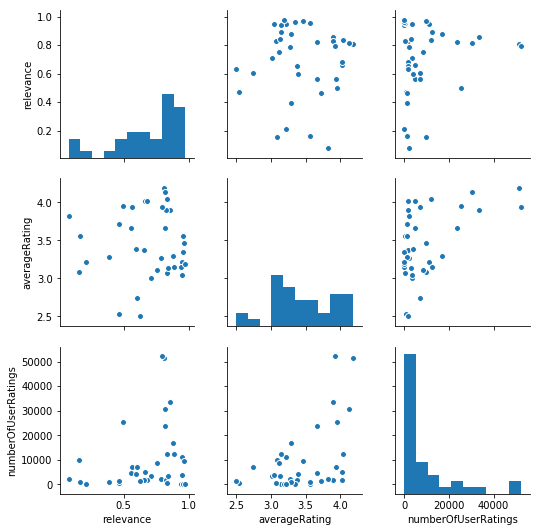

In [43]:
%matplotlib inline

sns.pairplot(ai_movies[['relevance','averageRating','numberOfUserRatings']])

## Calculating Ratings using Bayesian Average Modified Method

A Bayesian average is a method of estimating the mean of a population using outside information, especially a pre-existing belief, that is factored into the calculation. This is a central feature of Bayesian interpretation. This is relevant when the available data set is small.

Calculating the Bayesian average uses the prior mean $m$ and a constant $C$. $C$ is assigned a value that is proportional to the typical data set size. The value is larger when the expected variation between data sets (within the larger population) is small. It is smaller when the data sets are expected to vary substantially from one another.

$${\displaystyle {\bar {x}}={Cm+\sum _{i=1}^{n}x_{i} \over C+n} }$$

This is equivalent to adding $C$ data points of value $m$ to the data set.

We will modify this method and use $(0.5+(m-0.5)*r)$ instead of $m$ to calculate the rating of the movie, where $r$ is tag relevance score for the movie.

**Let us choose values for m and C.**

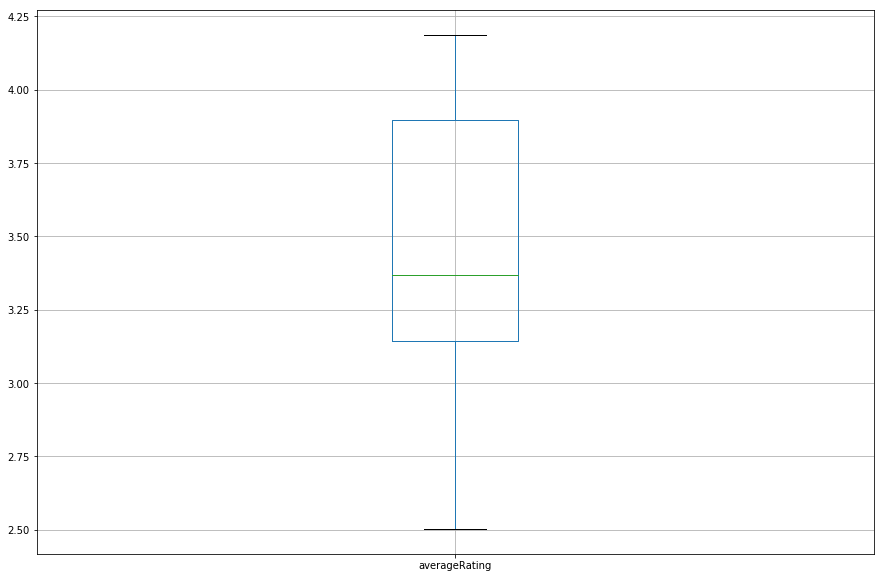

In [44]:
ai_movies.boxplot(column='averageRating',figsize=(15,10))

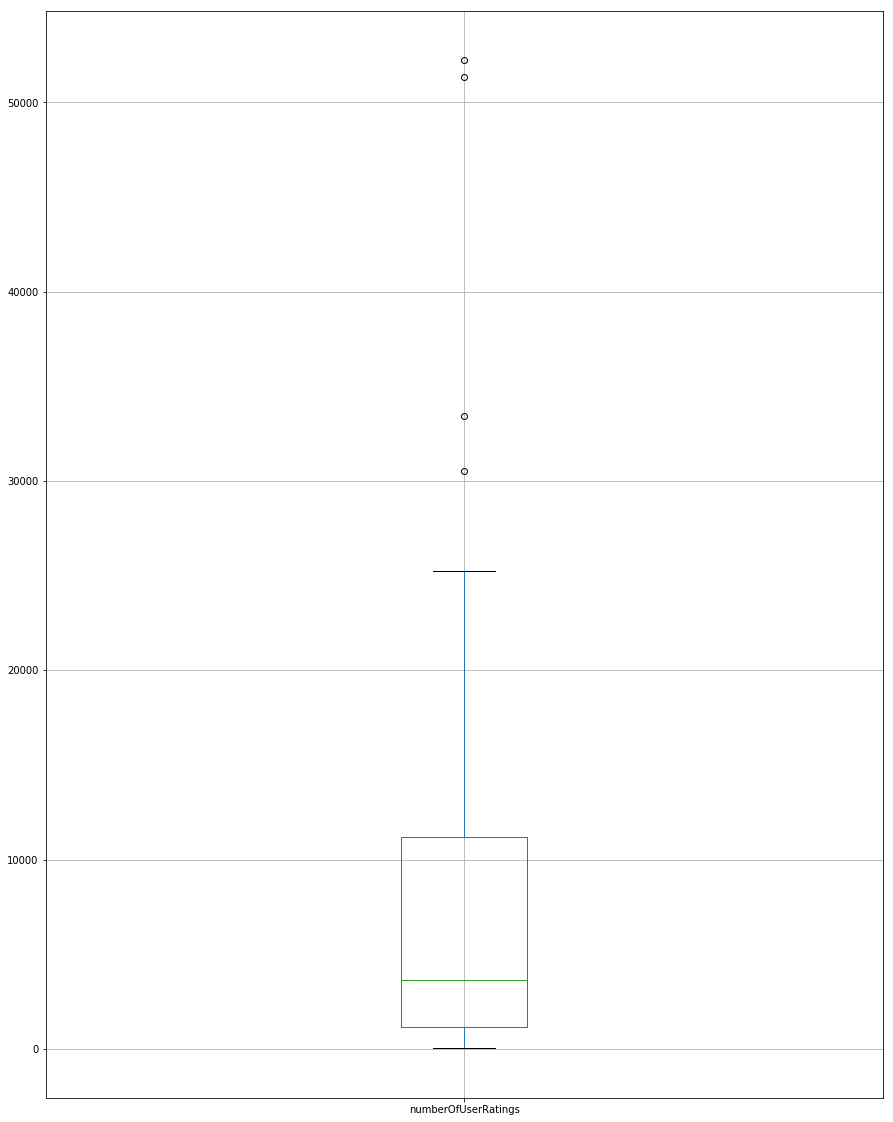

In [45]:
ai_movies.boxplot(column='numberOfUserRatings', figsize=(15,20))

We can choose those values using above box plots, but now we want to use a table with correlation coefficients for various values of $m$ and $C$.

In [46]:
mlist=[0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
Clist=np.arange(10,52240,10).tolist()
table=[]

for m in mlist:
    for C in Clist:
        ai_movies['rating']=(C*(0.5+(m-0.5)*ai_movies['relevance'])+ai_movies['numberOfUserRatings']*ai_movies['averageRating'])/(C+ai_movies['numberOfUserRatings'])
        table.append([m,C,np.corrcoef(ai_movies['rating'],ai_movies['relevance'])[1,0],np.corrcoef(ai_movies['rating'],ai_movies['averageRating'])[1,0],np.corrcoef(ai_movies['rating'],ai_movies['numberOfUserRatings'])[1,0]])

corr=pd.DataFrame(table,columns=['m','C','rating_relevance','rating_averageRating','rating_numberOfUserRatings'])

We want to have the correlation between rating and tag relevance score equals the correlation between rating and number of users ratings, to two decimal places.

In [47]:
corr[(np.abs(corr.rating_relevance-corr.rating_numberOfUserRatings)<0.0005)].sort_values('rating_averageRating', ascending=False)

,m,C,rating_relevance,rating_averageRating,rating_numberOfUserRatings
36595,4.0,350,0.461670,0.746902,0.462062
31460,3.5,1230,0.597240,0.659297,0.596858
26618,3.0,5040,0.706432,0.505448,0.706866
26619,3.0,5050,0.706685,0.505189,0.706837
26620,3.0,5060,0.706937,0.504931,0.706808
26621,3.0,5070,0.707188,0.504673,0.706779
22708,2.5,18170,0.753378,0.421064,0.753819
22709,2.5,18180,0.753448,0.421006,0.753777
22710,2.5,18190,0.753518,0.420947,0.753735
22711,2.5,18200,0.753587,0.420889,0.753693


Now we can see that for $m=4$ and $C=350$ we have the maximal correlation between rating and average rating, where the correlation between rating and tag relevance score and the correlation between rating and number of users ratings, is equal to two decimal places.

In [48]:
m=4.00
C=350
ai_movies['rating']=(C*(0.5+(m-0.5)*ai_movies['relevance'])+ai_movies['numberOfUserRatings']*ai_movies['averageRating'])/(C+ai_movies['numberOfUserRatings'])

In [49]:
ai_movies.head()

,movieId,title,relevance,averageRating,numberOfUserRatings,rating
0,4370,A.I. Artificial Intelligence (2001),0.94950,3.214050,11196,3.232517
1,2571,"Matrix, The (1999)",0.80950,4.187186,51334,4.181403
2,110407,"Machine, The (2013)",0.94325,3.150602,83,3.676631
3,8644,"I, Robot (2004)",0.96800,3.459808,9666,3.474770
4,924,2001: A Space Odyssey (1968),0.49550,3.955748,25253,3.932214


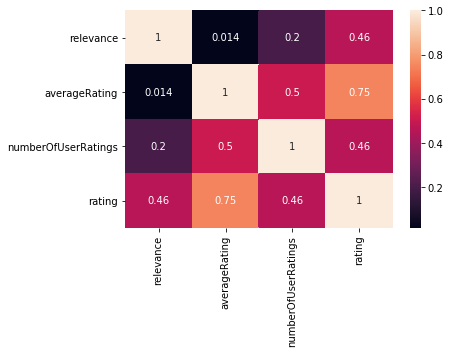

In [50]:
sns.heatmap(ai_movies[['relevance','averageRating','numberOfUserRatings','rating']].corr(), annot=True, xticklabels=ai_movies[['relevance','averageRating','numberOfUserRatings','rating']].columns.values, yticklabels=ai_movies[['relevance','averageRating','numberOfUserRatings','rating']].columns.values)

**Let us sort movies by their ratings and add an IMDb link for each movie.**

In [51]:
ai_movies=ai_movies.sort_values('rating',ascending=False)
ai_movies.head()

,movieId,title,relevance,averageRating,numberOfUserRatings,rating
1,2571,"Matrix, The (1999)",0.8095,4.187186,51334,4.181403
11,541,Blade Runner (1982),0.8155,4.133706,30526,4.124870
15,60069,WALL·E (2008),0.8365,4.038929,12176,4.021852
12,68237,Moon (2009),0.6620,4.021060,4867,3.940282
4,924,2001: A Space Odyssey (1968),0.4955,3.955748,25253,3.932214


In [52]:
ai_movies=ai_movies.merge(links,on='movieId')
ai_movies.index=np.arange(1,38)
ai_movies.head()

,movieId,title,relevance,averageRating,numberOfUserRatings,rating,imdbId
1,2571,"Matrix, The (1999)",0.8095,4.187186,51334,4.181403,133093
2,541,Blade Runner (1982),0.8155,4.133706,30526,4.124870,83658
3,60069,WALL·E (2008),0.8365,4.038929,12176,4.021852,910970
4,68237,Moon (2009),0.6620,4.021060,4867,3.940282,1182345
5,924,2001: A Space Odyssey (1968),0.4955,3.955748,25253,3.932214,62622


In [53]:
ai_movies['linkImdb']='http://www.imdb.com/title/tt'+ai_movies['imdbId'].astype(str)
del ai_movies['movieId']
del ai_movies['imdbId']
ai_movies

,title,relevance,averageRating,numberOfUserRatings,rating,linkImdb
1,"Matrix, The (1999)",0.80950,4.187186,51334,4.181403,http://www.imdb.com/title/tt133093
2,Blade Runner (1982),0.81550,4.133706,30526,4.124870,http://www.imdb.com/title/tt83658
3,WALL·E (2008),0.83650,4.038929,12176,4.021852,http://www.imdb.com/title/tt910970
4,Moon (2009),0.66200,4.021060,4867,3.940282,http://www.imdb.com/title/tt1182345
5,2001: A Space Odyssey (1968),0.49550,3.955748,25253,3.932214,http://www.imdb.com/title/tt62622
6,Terminator 2: Judgment Day (1991),0.79700,3.931954,52244,3.927679,http://www.imdb.com/title/tt103064
7,"Terminator, The (1984)",0.85700,3.896392,33429,3.892280,http://www.imdb.com/title/tt88247
8,Ghost in the Shell (Kôkaku kidôtai) (1995),0.56350,3.944641,7072,3.875207,http://www.imdb.com/title/tt113568
9,Interstellar (2014),0.67825,4.023864,1739,3.831190,http://www.imdb.com/title/tt816692
10,Her (2013),0.82800,3.901944,1800,3.819907,http://www.imdb.com/title/tt1798709


**Let us see top 10 rated movies tagged with "artificial intelligence".**

In [54]:
top_10_ai=ai_movies[:10]
del top_10_ai['relevance']
del top_10_ai['averageRating']
del top_10_ai['numberOfUserRatings']
del top_10_ai['rating']
top_10_ai

,title,linkImdb
1,"Matrix, The (1999)",http://www.imdb.com/title/tt133093
2,Blade Runner (1982),http://www.imdb.com/title/tt83658
3,WALL·E (2008),http://www.imdb.com/title/tt910970
4,Moon (2009),http://www.imdb.com/title/tt1182345
5,2001: A Space Odyssey (1968),http://www.imdb.com/title/tt62622
6,Terminator 2: Judgment Day (1991),http://www.imdb.com/title/tt103064
7,"Terminator, The (1984)",http://www.imdb.com/title/tt88247
8,Ghost in the Shell (Kôkaku kidôtai) (1995),http://www.imdb.com/title/tt113568
9,Interstellar (2014),http://www.imdb.com/title/tt816692
10,Her (2013),http://www.imdb.com/title/tt1798709


**Let us see top 10 rated movies tagged with "artificial intelligence", with tag relevance score greater than 50th percentile and number of user ratings less than or equal to 75th percentile.**

In [55]:
top_10_75th_ai=ai_movies.sort_values('relevance',ascending=False)
top_10_75th_ai=top_10_75th_ai[(top_10_75th_ai.relevance>0.785000) & (top_10_75th_ai.numberOfUserRatings<=11196)].sort_values('rating',ascending=False)[:10]
del top_10_75th_ai['relevance']
del top_10_75th_ai['averageRating']
del top_10_75th_ai['numberOfUserRatings']
del top_10_75th_ai['rating']
top_10_75th_ai.index=np.arange(1,11)
top_10_75th_ai

,title,linkImdb
1,Her (2013),http://www.imdb.com/title/tt1798709
2,Chappie (2015),http://www.imdb.com/title/tt1823672
3,Autómata (Automata) (2014),http://www.imdb.com/title/tt1971325
4,Colossus: The Forbin Project (1970),http://www.imdb.com/title/tt64177
5,"Machine, The (2013)",http://www.imdb.com/title/tt2317225
6,"I, Robot (2004)",http://www.imdb.com/title/tt343818
7,Transcendence (2014),http://www.imdb.com/title/tt2209764
8,A.I. Artificial Intelligence (2001),http://www.imdb.com/title/tt212720
9,Short Circuit (1986),http://www.imdb.com/title/tt91949
10,Bicentennial Man (1999),http://www.imdb.com/title/tt182789


This is a list of the top 10 rated AI movies that are not so famous  and you (probably) have not seen them.

You will choose one of above lists, which is better for you, and enjoy watching top 10 rated AI movies, rated by users of MovieLens website!

## References

0. *Bayesian Average Ratings*. http://www.evanmiller.org/bayesian-average-ratings.html
0. *Of Bayesian average and star ratings*. https://fulmicoton.com/posts/bayesian_rating/
0. *Bayesian Average Ratings*. https://en.wikipedia.org/wiki/Bayesian_average